<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 8

### **Q1** Sampling theorem and aliasing

<div style='background:#F0F0F0'>**1** Create a band-limited white noise timeseries with $N=1000$ entries, $dt=0.1 s$, but with all frequencies greater than 0.5 Hz filtered.  Plot the power spectrum to make sure you got it correctly...
</div>

/Users/jklymak/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


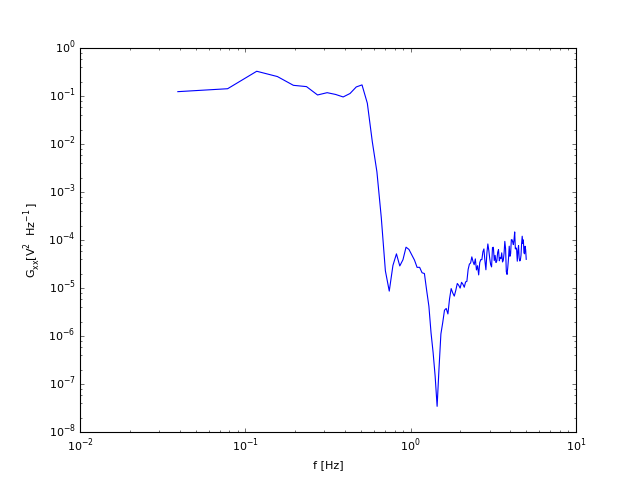

In [6]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.signal as signal
%matplotlib nbagg

### BEGIN SOLUTION
N=1000
dt=0.1
nfft=500
t=np.arange(0,N*dt,dt)

x = random.randn(N) # red noise
fN=1./dt/2.
N,Wn=signal.ellipord(.5/fN,0.8/fN,  1., 35., analog=False)
b,a=signal.ellip(N=N,rp=1.,rs=35.,Wn=Wn,btype='low')
x=signal.lfilter(b,a,x)
pxx,f=mlab.psd(x,Fs=1./dt,noverlap=nfft/2,window=mlab.window_hanning)
fig,ax=plt.subplots(1,1)
ax.loglog(f,pxx)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('$G_{xx} [V^2\ Hz^{-1}]$')
### END SOLUTION

<div style='background:#F0F0F0'>**2** Now decimate by a factor of 4 to get a time series sampled at 2.5 Hz.  Show that you can recover the 10 Hz time series using the Sampling Theorem.</div>

1.25
4


<IPython.core.display.Javascript object>


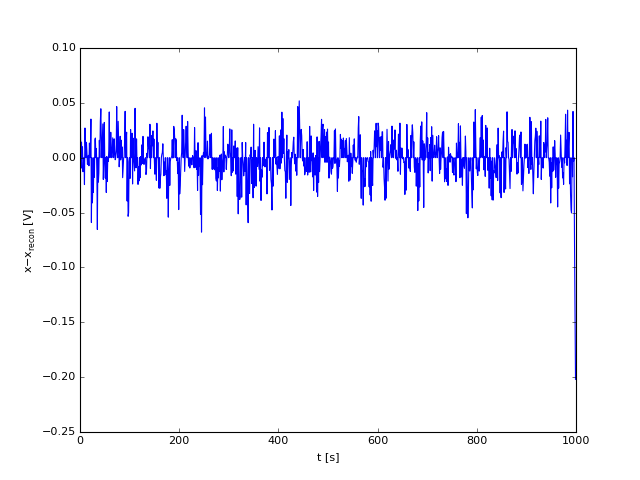

In [7]:
### BEGIN SOLUTION
xdec = x[::4]
tdec=t[::4]
# get the reconstructed x
xreco=x*0.
dtdec=dt*4.
B = 1./2./dtdec
print B
n = np.arange(len(tdec))
print N
for i in range(len(x)):
    xreco[i] = np.sum(xdec*np.sinc(2.*B*t[i]-n))
fig,ax=plt.subplots(1,1)
ax.plot(xreco-x)
ax.set_xlabel('t [s]')
ax.set_ylabel('$x-x_{recon}\ [V]$')
### END SOLUTION

COMMENT HERE:

<div style='background:#F0F0F0'>**3** Now decimate by a factor of 40 to get a time series sampled at 0.25 Hz.  Show that you cannot recover the 10 Hz time series using the Sampling Theorem.</div>

0.125
4


<IPython.core.display.Javascript object>


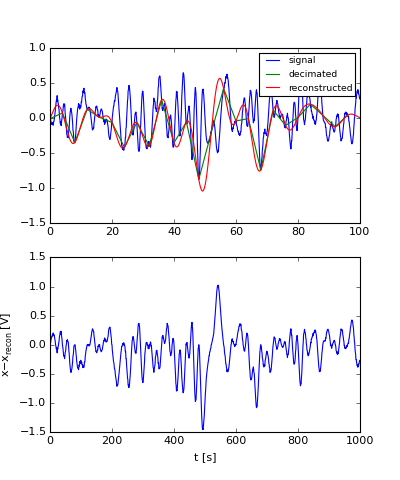

In [8]:
### BEGIN SOLUTION
deci=40
xdec = x[::deci]
tdec=t[::deci]
# get the reconstructed x
xreco=x*0.
dtdec=dt*deci
B = 1./2./dtdec
print B
n = np.arange(len(tdec))
print N
for i in range(len(x)):
    xreco[i] = np.sum(xdec*np.sinc(2.*B*t[i]-n))
fig,ax=plt.subplots(2,1,figsize=(5,6))
ax[0].plot(t,x,label='signal')
ax[0].plot(tdec,xdec,label='decimated')
ax[0].plot(t,xreco,label='reconstructed')
ax[0].legend(fontsize='small')
ax[1].set_ylabel('$x\ [V]$')
ax[1].plot(xreco-x)
ax[1].set_xlabel('t [s]')
ax[1].set_ylabel('$x-x_{recon}\ [V]$')
### END SOLUTION

COMMENT

## Q2: Cubic Spline

Using the data below...

In [10]:
t = np.array([0.,2.5,2.7,3.4,4.2,6.5,9.0])
x= np.cos(t*2*np.pi/3)


**1** Perform a cubic spline interpolation onto an even grid from 0 to 9.0 by 
  
  1. creating the matrix from the notes
  2. inverting and solving for the cubic co-efficients
  3. using those polynomials to evaluate the interpolated data.

Compare with using `scipy.interpolate.interp1d`.
Comment on any similarities or differences between the two results.

9.0
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9]


<IPython.core.display.Javascript object>


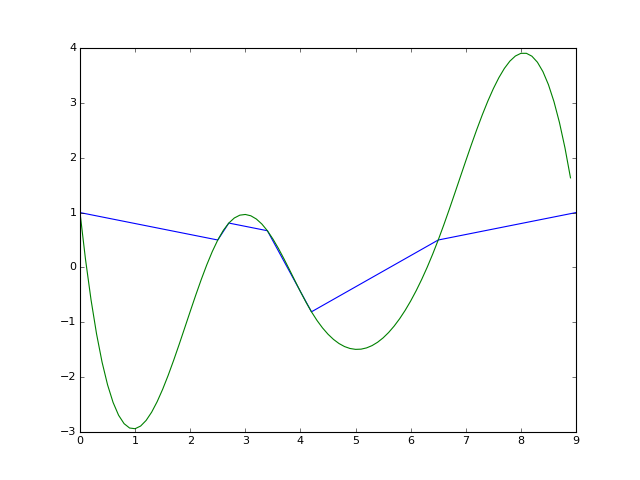

In [15]:
### BEGIN SOLUTION
import scipy.interpolate as interpolate
ti = np.arange(0.,np.max(t),0.1)
print np.max(t)
print ti
fi = interpolate.interp1d(t,x,kind='cubic')
xi = fi(ti)
fig,ax=plt.subplots()
ax.plot(t,x,ti,xi)
### END SOLUTION

<IPython.core.display.Javascript object>


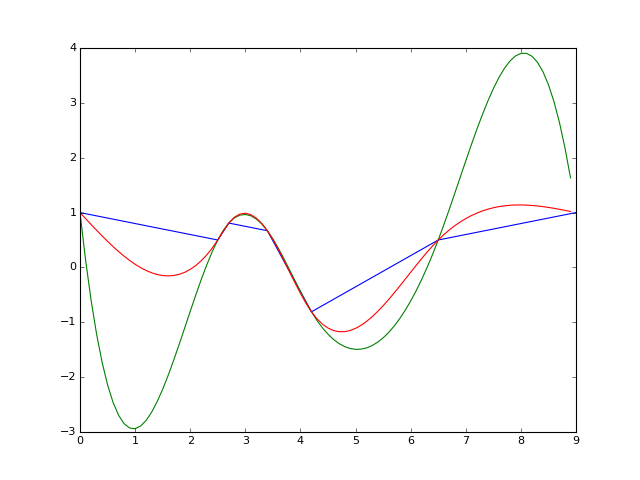

In [19]:
### BEGIN SOLUTION
# now do by hand
N = len(x)
C = np.zeros((N,N))
f = np.zeros(N)
C[0,0]=1.
C[-1,-1]=1.
delta = np.diff(t)
dx = np.diff(x)
for i in range(1,N-1):
    C[i,i-1]=delta[i-1]
    C[i,i]=(delta[i-1]+delta[i])*2.
    C[i,i+1]=delta[i]
    f[i]=3.*(dx[i]/delta[i]-dx[i-1]/delta[i-1])
c = np.dot(np.linalg.inv(C),f)
#print c
d = np.diff(c)/delta/3.
#print d
b = (dx-delta**2*c[:-1]-delta**3*d)/delta
#print b
c =c[:-1]
a = x[:-1]
# now we have a,b,c,d, lets interpolate!
xi2=0.*ti
for i in range(len(ti)):
    j= np.where((ti[i]>=t[:-1])&(ti[i]<t[1:]))[0][0]
    dt = (ti[i]-t[j])
    xi2[i]=a[j]+b[j]*dt+c[j]*dt**2+d[j]*dt**3
fig,ax=plt.subplots()
ax.plot(t,x,ti,xi,ti,xi2)
### END SOLUTION

<IPython.core.display.Javascript object>


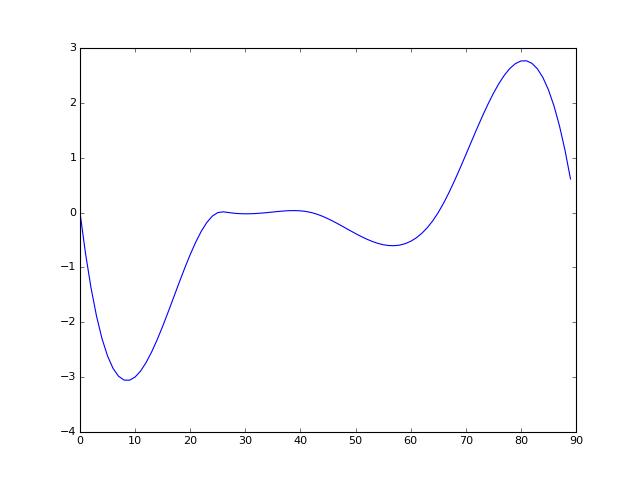

In [22]:
### BEGIN SOLUTION
fig,ax=plt.subplots()
ax.plot(xi-xi2)
### END SOLUTION